In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yashwanth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yashwanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Yashwanth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

[0] ['2024-01-24']


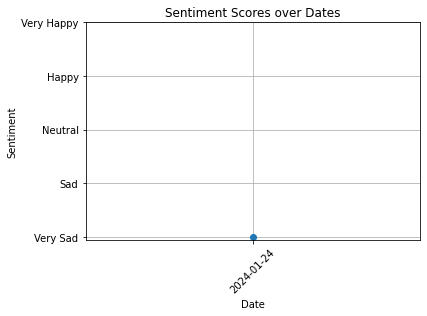

In [2]:
def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score

def categorize_emotion(sentiment_score):
    if sentiment_score >= 0.5:
        return "Very Happy"
    elif 0.2 <= sentiment_score < 0.5:
        return "Happy"
    elif -0.2 <= sentiment_score < 0.2:
        return "Neutral"
    elif -0.5 <= sentiment_score < -0.2:
        return "Sad"
    elif sentiment_score < -0.5:
        return "Very Sad"
    else:
        return "Mixed Emotions"

def main():
    # Initialize empty lists to store dates and sentiment scores
    dates = []
    sentiment_scores = []

    while True:
        date_input = input("Enter the date (YYYY-MM-DD) of your journal entry (or type 'exit' to finish): ")

        if date_input.lower() == 'exit':
            break

        # Check if the date is in the correct format
        if len(date_input) != 10 or date_input[4] != '-' or date_input[7] != '-':
            print("Invalid date format. Please enter the date in the format YYYY-MM-DD.")
            continue

        # Allow the user to input the journal entry
        text = input("Enter your journal entry for that date: ")

        # Tokenize and remove stopwords
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]

        # Calculate sentiment score
        processed_text = ' '.join(filtered_words)
        sentiment_score = get_sentiment(processed_text)

        # Append date and sentiment score to the lists
        dates.append(date_input)
        sentiment_scores.append(sentiment_score)

    # Map sentiment scores to emotion categories
    emotions = [categorize_emotion(score) for score in sentiment_scores]

    # Create a dictionary to map emotions to y-axis values
    emotion_ticks = {
        "Very Happy": 4,
        "Happy": 3,
        "Neutral": 2,
        "Sad": 1,
        "Very Sad": 0
    }

    # Map emotion categories to y-axis values
    y_values = [emotion_ticks[emotion] for emotion in emotions]
    print(y_values,dates)
    # Plot sentiment scores over dates
    plt.plot(dates, y_values, marker='o', linestyle='-')
    plt.title('Sentiment Scores over Dates')
    plt.xlabel('Date')
    plt.ylabel('Sentiment')
    plt.yticks(list(emotion_ticks.values()), list(emotion_ticks.keys()))  # Set y-axis ticks
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()